In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import _pickle as pkl
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import shutil
import scipy.stats as spstats

import trajectory as traj
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=12)
pl.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

util.set_sns_style(style='dark')

In [3]:
srcdir = '/home/julianarhee/Documents/projects/plume-tracking/data'

fnames = os.listdir(srcdir)
fnames

['heatmaps_0.p', 'heatmaps_45.p', 'T_plume.p']

In [4]:
import _pickle as pkl

In [54]:
fpath = os.path.join(srcdir, fnames[0])
with open(fpath, 'rb') as f:
    dfdict = pkl.load(f)
    

In [55]:
dfdict.keys()

dict_keys(['x_bounds', 'y_bounds', 'x_bounds_rotate', 'y_bounds_rotate', 'fly_density', 'fly_density_rotate'])

In [7]:
dfdict['03042022-140837_T_plume.log']['data'].columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds'],
      dtype='object')

In [8]:
#dfdict['03042022-140837_T_plume.log']['data']

d_list = []
for fi, (fn, df_) in enumerate(dfdict.items()):
    if 'instrip' not in df_['data'].columns:
        print(fn)
    df_z = putil.zero_trajectory(df_['data'])
    d_ = pd.DataFrame({
        'ft_posx': df_z['ft_posx'],
        'ft_posy': df_z['ft_posy'],
        'filename': fn,
        'fly_id': fi
    })
    d_list.append(d_)
df = pd.concat(d_list, axis=0)


In [9]:
import scipy as sp

In [10]:
max_nframes = df.groupby('filename')['ft_posy'].count().max()

d_list=[]
for fi, (fn, df_) in enumerate(df.groupby('filename')):
    #up_ = traj.upsample_bout_trajectories(df_, npoints=max_nframes)
    x = df_['ft_posx'].values
    y = df_['ft_posy'].values
    t = np.arange(len(df_))
    t_common = np.linspace(t[0], t[-1], max_nframes)
    fx = sp.interpolate.interp1d(t, x)
    fy = sp.interpolate.interp1d(t, y)

    interpx =fx(t_common)
    interpy = fy(t_common)
    d_ = pd.DataFrame({
        'ft_posx': interpx,
        'ft_posy': interpy,
        'filename': fn,
        'fly_id': fi
    })    
    d_list.append(d_)


In [11]:
updf = pd.concat(d_list, axis=0)
updf.groupby('filename').count()

,ft_posx,ft_posy,fly_id
filename,,,
03042022-140837_T_plume.log,115876,115876,115876
03042022-153138_T_plume_Fly2_T1.log,115876,115876,115876
03042022-155820_T_plume_Fly2_T2.log,115876,115876,115876
03042022-180206_T_plume_Fly3.log,115876,115876,115876
03042022-183431_T_Plume_Fly4.log,115876,115876,115876
03042022-190904_T_plume_Fly5.log,115876,115876,115876
03072022-135441_T_Plume_Fly6.log,115876,115876,115876
03072022-154741T_Plume_Fly7_T1(fictrac lost tracking).log,115876,115876,115876
03072022-160439_T_Plume_Fly7_t2.log,115876,115876,115876


<IPython.core.display.Javascript object>


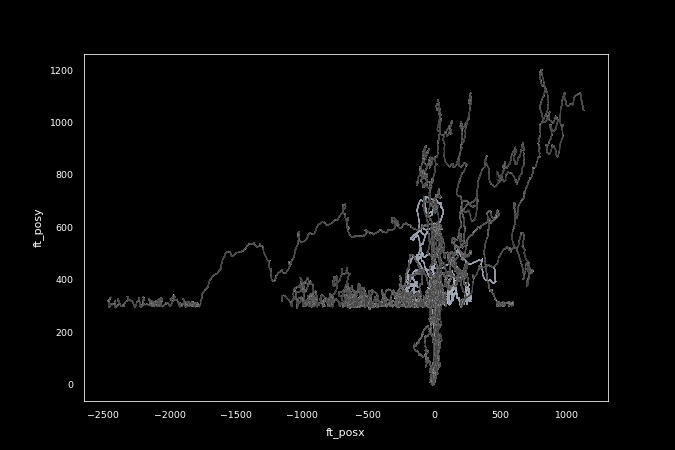

In [12]:
fig, ax= pl.subplots()
for fn, df_ in df.groupby('filename'):
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', s=0.3, color='w', ax=ax,
                   hue='fly_id', palette='bone', legend=0)

<IPython.core.display.Javascript object>


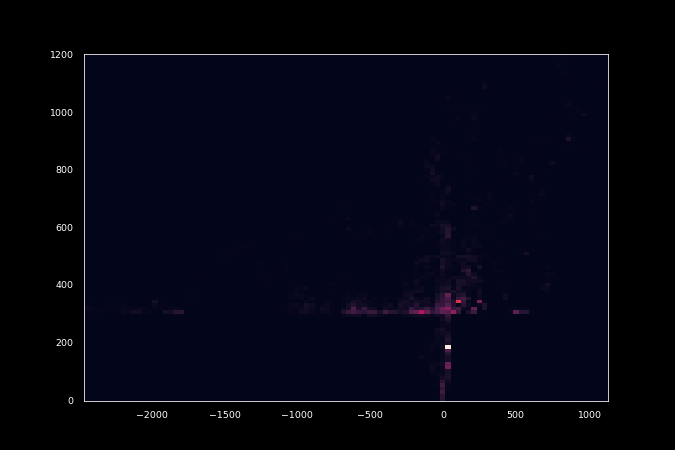

In [19]:
fig, ax = pl.subplots()
h, xe, ye, img = ax.hist2d(df['ft_posx'], df['ft_posy'], bins=100)

In [22]:
df.shape

(548349, 4)

In [48]:
d_list = []
for i, (xi, yi) in enumerate(zip(xe[0:-1], ye[0:-1])):
    startix, endix = xi, xe[i+1]
    curr_n_x = df[(df['ft_posx']>=startix) & (df['ft_posx']<endix)]['filename'].nunique()
    startix, endix = yi, ye[i+1]
    curr_n_y = df[(df['ft_posy']>=startix) & (df['ft_posy']<endix)]['filename'].nunique()
    
    d_ = pd.DataFrame({
        'edge': ['x', 'y'],
        'edge_value': [xi, yi],
        'n_flies': [curr_n_x, curr_n_y],
        'index': [i, i]
    }, index=[i, i])
    
    d_list.append(d_)
cnts = pd.concat(d_list).reset_index(drop=True)
    

In [56]:
dfdict.keys()

dict_keys(['x_bounds', 'y_bounds', 'x_bounds_rotate', 'y_bounds_rotate', 'fly_density', 'fly_density_rotate'])

In [62]:
dfdict['fly_density'].min(), dfdict['fly_density'].max()

(0.0, 0.003331988240041506)

<IPython.core.display.Javascript object>


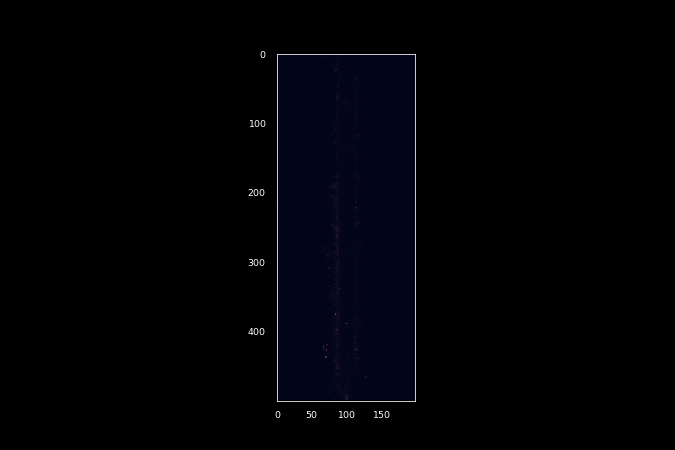

In [61]:
fig, ax= pl.subplots()
ax.imshow(dfdict['fly_density'])

<IPython.core.display.Javascript object>


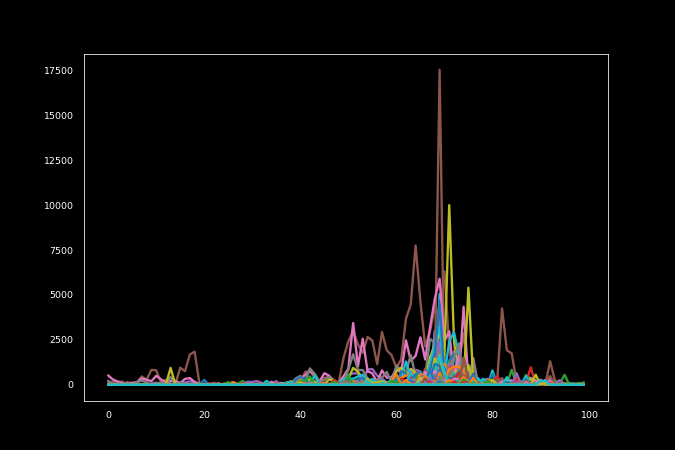

In [24]:
fig, ax = pl.subplots()
ax.plot(h)

<IPython.core.display.Javascript object>


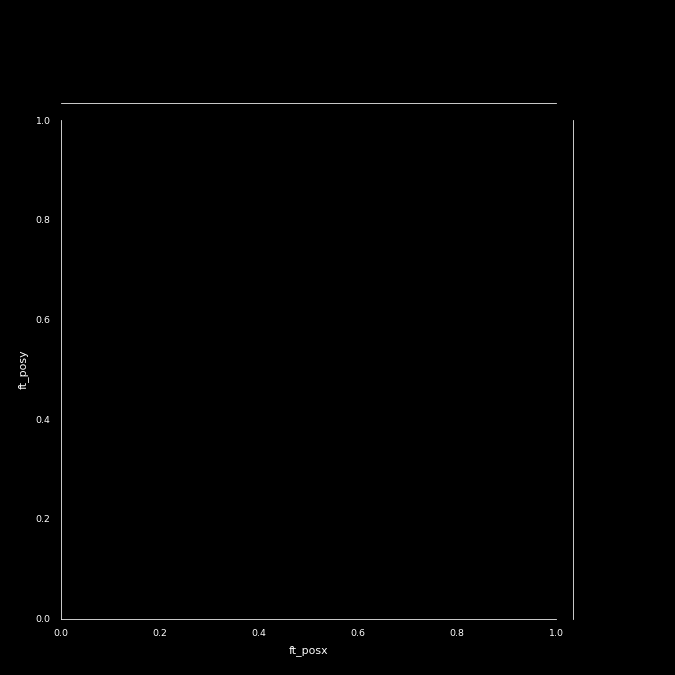

ValueError: Contour levels must be increasing

In [17]:
kdeplot = sns.jointplot(data=df, x="ft_posx", y="ft_posy", kind="hex",
              joint_kws=dict(gridsize=20))
             #marginal_kws=dict(bins=1000, fill=False))
# make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.colorbar(cax=cbar_ax)

pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
                               pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# get the current colorbar ticks
cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# get the maximum value of the colorbar
_, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# change the labels (not the ticks themselves) to a percentage
kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])

pl.show()